In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import scipy
from scipy.stats.stats import pearsonr
import pandas.util.testing as tm
from scipy.stats import spearmanr
import statsmodels.api as sm

In [ ]:
df = pd.read_csv("19states_covid-19 cases (1).csv", index_col = 0)
df.head()

,Total_confirmed,0-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,Total Male_confirmed,...,Hispanic_confirmed,Asian_confirmed,American indian and Alaska native_confirmed,Total population_Male,Total population_Female,Hispanic,White,Black or African American,American Indian and Alaska Native,Asian
State,,,,,,,,,,,,,,,,,,,,,
California,329162,31015,74003,64870,53279,47498,29954,15033,13113,164635,...,1563,12648,458,19673553,19883492,15261300,23535388,2283850,302792,5821585
Colorado,37686,3369,7409,6621,6169,5608,3769,2321,2382,17882,...,13657,738,183,2864761,2830803,1200900,4790677,237578,55146,180277
Connecticut,47287,2112,5807,6707,6655,7956,6589,4434,6971,20453,...,8973,684,45,1740533,1832132,576400,2688136,391552,9507,165855
Illinois,153916,12431,26577,25311,26633,25346,17643,9805,10114,72590,...,48999,4317,0,6266062,6475018,2173800,9135145,1793079,35846,717938
Maryland,74260,6401,11590,13905,12952,11467,8130,5119,4686,35620,...,19701,1446,0,2930350,3112368,613900,3305047,1810885,13433,378985


In [ ]:
spearmanr(df['Total_confirmed'], df['White_confirmed'])

SpearmanrResult(correlation=0.8894736842105263, pvalue=3.497015717376129e-07)

In [ ]:
spearmanr(df['Total_confirmed'], df['Black or African American_confirmed'])

SpearmanrResult(correlation=0.7666666666666666, pvalue=0.00012866505735862106)

In [ ]:
spearmanr(df['Total_confirmed'], df['Hispanic_confirmed'])

SpearmanrResult(correlation=0.46336116790648674, pvalue=0.045711195338586294)

In [ ]:
spearmanr(df['Total_confirmed'], df['Asian_confirmed'])

SpearmanrResult(correlation=0.7280701754385965, pvalue=0.0004091009120770056)

In [ ]:
spearmanr(df['Total_confirmed'], df['American indian and Alaska native_confirmed'])

SpearmanrResult(correlation=-0.15592095423895624, pvalue=0.5238509074136135)

# cases per population

In [ ]:
per_df = pd.DataFrame()
per_df['tot_pop'] = df['Total population_Male'] + df['Total population_Female']
per_df['Total_confirmed'] = (df['Total_confirmed']/per_df['tot_pop']) * 100
per_df

,tot_pop,Total_confirmed
State,,
California,39557045,0.832120
Colorado,5695564,0.661673
Connecticut,3572665,1.323578
Illinois,12741080,1.208029
Maryland,6042718,1.228917
Massachusetts,6902149,1.530378
Michigan,9995915,0.694164
Minnesota,5611179,0.753514
Mississippi,2986530,1.185958


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, California to Wisconsin
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Total_confirmed                              19 non-null     int64
 1   0-19                                         19 non-null     int64
 2   20-29                                        19 non-null     int64
 3   30-39                                        19 non-null     int64
 4   40-49                                        19 non-null     int64
 5   50-59                                        19 non-null     int64
 6   60-69                                        19 non-null     int64
 7   70-79                                        19 non-null     int64
 8   80+                                          19 non-null     int64
 9   Total Male_confirmed                         19 non-null     int64
 10  Total Female_conf

In [ ]:
per_df['White_confirmed'] = df['White_confirmed']/df['White']
per_df['Hispanic_confirmed'] = df['Hispanic_confirmed']/df['Hispanic']
per_df['Black or African American_confirmed'] = df['Black or African American_confirmed']/df['Black or African American']
per_df['Asian_confirmed'] = df['Asian_confirmed']/df['Asian']
per_df['American indian and Alaska native_confirmed'] = df['American indian and Alaska native_confirmed']/df['American Indian and Alaska Native']
per_df

,tot_pop,Total_confirmed,White_confirmed,Hispanic_confirmed,Black or African American_confirmed,Asian_confirmed,American indian and Alaska native_confirmed
State,,,,,,,
California,39557045,0.832120,0.001589,0.000102,0.004027,0.002173,0.001513
Colorado,5695564,0.661673,0.002543,0.011372,0.007766,0.004094,0.003318
Connecticut,3572665,1.323578,0.006179,0.015567,0.015806,0.004124,0.004733
Illinois,12741080,1.208029,0.003664,0.022541,0.014404,0.006013,0.000000
Maryland,6042718,1.228917,0.004587,0.032092,0.011886,0.003815,0.000000
Massachusetts,6902149,1.530378,0.006387,0.026434,0.019521,0.004941,0.000000
Michigan,9995915,0.694164,0.003606,0.009604,0.014939,0.004613,0.000000
Minnesota,5611179,0.753514,0.003888,0.002330,0.023568,0.010739,0.005657
Mississippi,2986530,1.185958,0.005619,0.020148,0.014758,0.004246,0.083497


In [ ]:
spearmanr(per_df['Total_confirmed'], per_df['White_confirmed'])

SpearmanrResult(correlation=0.7982456140350876, pvalue=4.1992113655828164e-05)

In [ ]:
spearmanr(per_df['Total_confirmed'], per_df['Hispanic_confirmed'])

SpearmanrResult(correlation=0.5607723225231914, pvalue=0.012500558445195003)

In [ ]:
spearmanr(per_df['Total_confirmed'], per_df['Black or African American_confirmed'])

SpearmanrResult(correlation=0.45964912280701753, pvalue=0.04770770316578596)

In [ ]:
spearmanr(per_df['Total_confirmed'], per_df['Asian_confirmed'])

SpearmanrResult(correlation=0.08771929824561404, pvalue=0.7210236536238765)

In [ ]:
spearmanr(per_df['Total_confirmed'], per_df['American indian and Alaska native_confirmed'])

SpearmanrResult(correlation=-0.17997733003582378, pvalue=0.46094164405372395)

# OLS - Ordinary Least Squares Method

In [1]:
import statsmodels.api as sm
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Y = per_df['Total_confirmed']
# X = per_df['White_confirmed']
# X = sm.add_constant(X)
model = sm.OLS(per_df['Total_confirmed'],per_df['White_confirmed'])
results = model.fit()
results.params
results.summary()

NameError: ignored

In [ ]:
model = sm.OLS(per_df['Total_confirmed'],per_df['Hispanic_confirmed'])
results = model.fit()
results.params
results.summary()

In [ ]:
model = sm.OLS(per_df['Total_confirmed'],per_df['Black or African American_confirmed'])
results = model.fit()
results.params
results.summary()

In [ ]:
model = sm.OLS(per_df['Total_confirmed'],per_df['Asian_confirmed'])
results = model.fit()
results.params
results.summary()

In [ ]:
model = sm.OLS(per_df['Total_confirmed'],per_df['American indian and Alaska native_confirmed'])
results = model.fit()
results.params
results.summary()

# Traning a Linear Regression Model for White race

In [ ]:
df=df.astype({'White_confirmed': 'int32', 'White_confirmed': 'int32'})

(array([3., 2., 2., 2., 2., 1., 1., 1., 3., 2.]),
 array([ 4480. ,  7790.8, 11101.6, 14412.4, 17723.2, 21034. , 24344.8,
        27655.6, 30966.4, 34277.2, 37588. ]),
 <a list of 10 Patch objects>)

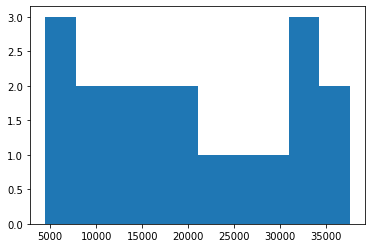

In [ ]:
 plt.hist(x = df["White_confirmed"])

(array([9., 6., 1., 0., 1., 1., 0., 0., 0., 1.]),
 array([ 12438. ,  44110.4,  75782.8, 107455.2, 139127.6, 170800. ,
        202472.4, 234144.8, 265817.2, 297489.6, 329162. ]),
 <a list of 10 Patch objects>)

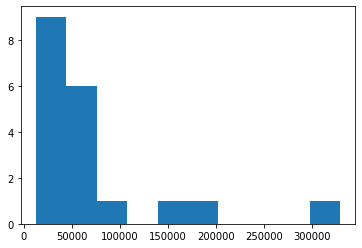

In [ ]:
plt.hist(x = df["Total_confirmed"])

In [ ]:
x= df[['White_confirmed']]
y= df[['Total_confirmed']]

In [ ]:
x.columns

Index(['White_confirmed'], dtype='object')

In [ ]:
from sklearn import preprocessing
import numpy as np

x_arr = np.array(x).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
x_scaler = standardscaler.fit_transform(x_arr)
# print(x_scaler)

x_scaledback = standardscaler.inverse_transform(x_scaler)
print(x_scaledback)

[[37400.]
 [12181.]
 [16610.]
 [33468.]
 [15161.]
 [34076.]
 [28216.]
 [17997.]
 [ 9752.]
 [12100.]
 [ 4480.]
 [37588.]
 [31621.]
 [ 5183.]
 [ 6295.]
 [18552.]
 [26607.]
 [10048.]
 [21542.]]


In [ ]:
y_arr = np.array(y).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
y_scaler = standardscaler.fit_transform(y_arr)
# print(y_scaler)

y_scaledback = standardscaler.inverse_transform(y_scaler)
print(y_scaledback)

[[329162.]
 [ 37686.]
 [ 47287.]
 [153916.]
 [ 74260.]
 [105629.]
 [ 69388.]
 [ 42281.]
 [ 35419.]
 [ 21172.]
 [ 27683.]
 [175298.]
 [ 66853.]
 [ 12438.]
 [ 17487.]
 [ 56648.]
 [ 65274.]
 [ 39218.]
 [ 36942.]]


# Train Test and Split the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x_scaler,y_scaler)

# Creating and Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Print out the coefficients of the model

In [ ]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[0.80870351]]


# Predicting Test Data

In [ ]:
predictions = lm.predict(x_test)

Text(0, 0.5, 'y_test')

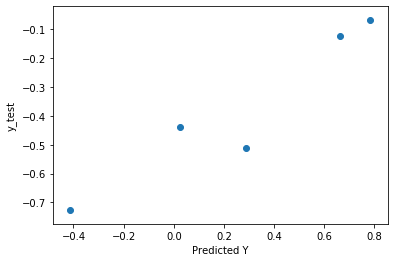

In [ ]:
plt.scatter(predictions,y_test)
plt.xlabel('Predicted Y')
plt.ylabel('y_test')

# Evaluating the Model

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:' ,metrics.mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.6432579657849704
MSE: 0.45980714797298267
RMSE: 0.678090811007628


# Residuals

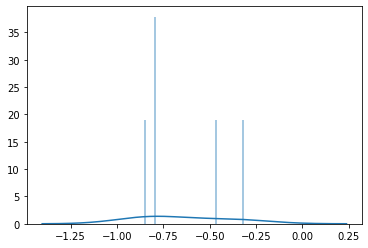

In [ ]:
sns.distplot((y_test-predictions),bins=51);

In [ ]:
coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coeffecients']
coeffecients

,Coeffecients
White_confirmed,0.808704


# Linear regression model for Hispanic race

In [ ]:
 df=df.astype({'Hispanic_confirmed': 'int32', 'Hispanic_confirmed': 'int32'})

(array([9., 3., 3., 0., 2., 0., 1., 0., 0., 1.]),
 array([    0. ,  4899.9,  9799.8, 14699.7, 19599.6, 24499.5, 29399.4,
        34299.3, 39199.2, 44099.1, 48999. ]),
 <a list of 10 Patch objects>)

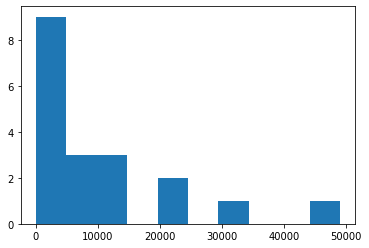

In [ ]:
 plt.hist(x = df["Hispanic_confirmed"])

(array([9., 6., 1., 0., 1., 1., 0., 0., 0., 1.]),
 array([ 12438. ,  44110.4,  75782.8, 107455.2, 139127.6, 170800. ,
        202472.4, 234144.8, 265817.2, 297489.6, 329162. ]),
 <a list of 10 Patch objects>)

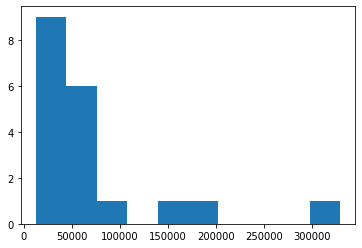

In [ ]:
plt.hist(x = df['Total_confirmed'])

In [ ]:
x = df[['Hispanic_confirmed']]
y = df[['Total_confirmed']]

In [ ]:
x.columns

Index(['Hispanic_confirmed'], dtype='object')

In [ ]:
from sklearn import preprocessing
import numpy as np

x_arr = np.array(x).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
x_scaler = standardscaler.fit_transform(x_arr)
# print(x_scaler)

x_scaledback = standardscaler.inverse_transform(x_scaler)
print(x_scaledback)

[[ 1563.]
 [13657.]
 [ 8973.]
 [48999.]
 [19701.]
 [21803.]
 [ 4830.]
 [  690.]
 [ 1636.]
 [    0.]
 [ 6129.]
 [31946.]
 [ 2171.]
 [  311.]
 [ 8044.]
 [    0.]
 [10012.]
 [12295.]
 [ 3947.]]


In [ ]:
y_arr = np.array(y).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
y_scaler = standardscaler.fit_transform(y_arr)
# print(y_scaler)

y_scaledback = standardscaler.inverse_transform(y_scaler)
print(y_scaledback)

[[329162.]
 [ 37686.]
 [ 47287.]
 [153916.]
 [ 74260.]
 [105629.]
 [ 69388.]
 [ 42281.]
 [ 35419.]
 [ 21172.]
 [ 27683.]
 [175298.]
 [ 66853.]
 [ 12438.]
 [ 17487.]
 [ 56648.]
 [ 65274.]
 [ 39218.]
 [ 36942.]]


# Train Test and Split the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x_scaler,y_scaler)

# Creating and Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[0.21704461]]


# Predicting Test Data

In [ ]:
predictions = lm.predict(x_test)

Text(0, 0.5, 'y_test')

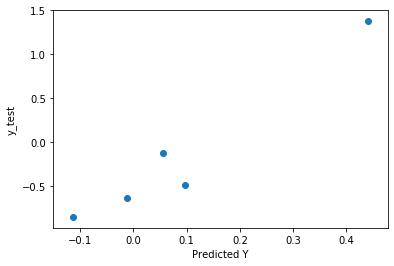

In [ ]:
plt.scatter(predictions,y_test)
plt.xlabel('Predicted Y')
plt.ylabel('y_test')

# Evaluating the Model

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:' ,metrics.mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.6096339822729171
MSE: 0.43284897346338075
RMSE: 0.6579125880110371


# Linear regression model for Black or African American race

In [ ]:
 df=df.astype({'Black or African American_confirmed': 'int32', 'Black or African American_confirmed': 'int32'})

(array([6., 0., 2., 3., 2., 0., 3., 1., 1., 1.]),
 array([  523. ,  3053.5,  5584. ,  8114.5, 10645. , 13175.5, 15706. ,
        18236.5, 20767. , 23297.5, 25828. ]),
 <a list of 10 Patch objects>)

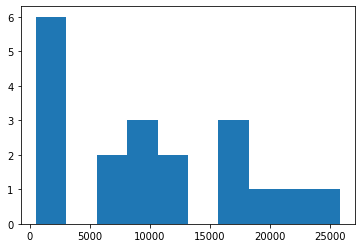

In [ ]:
plt.hist(x = df["Black or African American_confirmed"])

(array([9., 6., 1., 0., 1., 1., 0., 0., 0., 1.]),
 array([ 12438. ,  44110.4,  75782.8, 107455.2, 139127.6, 170800. ,
        202472.4, 234144.8, 265817.2, 297489.6, 329162. ]),
 <a list of 10 Patch objects>)

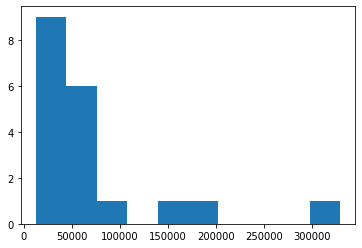

In [ ]:
plt.hist(x = df["Total_confirmed"])

In [ ]:
x = df[['Black or African American_confirmed']]
y = df[['Total_confirmed']]

In [ ]:
x.columns

Index(['Black or African American_confirmed'], dtype='object')

In [ ]:
from sklearn import preprocessing
import numpy as np

x_arr = np.array(x).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
x_scaler = standardscaler.fit_transform(x_arr)
# print(x_scaler)

x_scaledback = standardscaler.inverse_transform(x_scaler)
print(x_scaledback)

[[ 9196.]
 [ 1845.]
 [ 6189.]
 [25828.]
 [21525.]
 [10493.]
 [20567.]
 [ 8665.]
 [16759.]
 [ 1300.]
 [ 1261.]
 [17880.]
 [17699.]
 [  523.]
 [ 2098.]
 [12905.]
 [12883.]
 [ 1520.]
 [ 6145.]]


In [ ]:
from sklearn import preprocessing
import numpy as np

x_arr = np.array(x).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
x_scaler = standardscaler.fit_transform(x_arr)
# print(x_scaler)

x_scaledback = standardscaler.inverse_transform(x_scaler)
print(x_scaledback)

[[ 9196.]
 [ 1845.]
 [ 6189.]
 [25828.]
 [21525.]
 [10493.]
 [20567.]
 [ 8665.]
 [16759.]
 [ 1300.]
 [ 1261.]
 [17880.]
 [17699.]
 [  523.]
 [ 2098.]
 [12905.]
 [12883.]
 [ 1520.]
 [ 6145.]]


# Train Test and Split the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x_scaler,y_scaler)


# Creating and Training the Model

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[0.47869028]]


# Predicting Test Data

In [ ]:
predictions = lm.predict(x_test)

Text(0, 0.5, 'y_test')

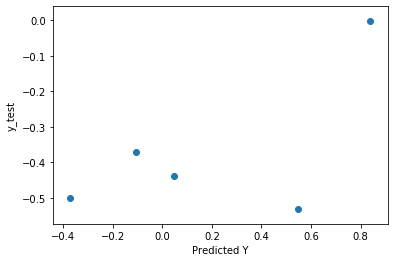

In [ ]:
plt.scatter(predictions,y_test)
plt.xlabel('Predicted Y')
plt.ylabel('y_test')

# Evaluating The Model

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:' ,metrics.mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5601755790784322
MSE: 0.43853887071551745
RMSE: 0.6622226745706594


# Residuals

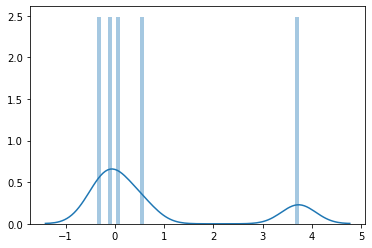

In [ ]:
sns.distplot((y_test-predictions),bins=51);

In [ ]:
coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coeffecients']
coeffecients

,Coeffecients
Black or African American_confirmed,0.381388


# Linear regression model for Asian race

In [ ]:
 df=df.astype({'Asian_confirmed': 'int32', 'Asian_confirmed': 'int32'})

(array([16.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([    0. ,  3194.6,  6389.2,  9583.8, 12778.4, 15973. , 19167.6,
        22362.2, 25556.8, 28751.4, 31946. ]),
 <a list of 10 Patch objects>)

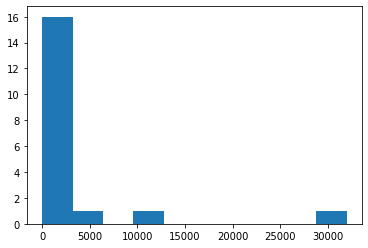

In [ ]:
 plt.hist(x = df["Asian_confirmed"])

(array([9., 6., 1., 0., 1., 1., 0., 0., 0., 1.]),
 array([ 12438. ,  44110.4,  75782.8, 107455.2, 139127.6, 170800. ,
        202472.4, 234144.8, 265817.2, 297489.6, 329162. ]),
 <a list of 10 Patch objects>)

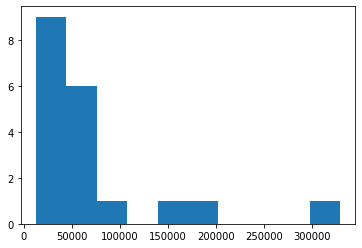

In [ ]:
plt.hist(x= df["Total_confirmed"])

In [ ]:
x = df[['Asian_confirmed']]
y = df[['Total_confirmed']]

In [ ]:
x.columns

Index(['Asian_confirmed'], dtype='object')

In [ ]:
from sklearn import preprocessing
import numpy as np

x_arr = np.array(x).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
x_scaler = standardscaler.fit_transform(x_arr)
# print(x_scaler)

x_scaledback = standardscaler.inverse_transform(x_scaler)
print(x_scaledback)

[[12648.]
 [  738.]
 [  684.]
 [ 4317.]
 [ 1446.]
 [ 2334.]
 [ 1503.]
 [ 2933.]
 [  111.]
 [ 1200.]
 [ 1164.]
 [31946.]
 [ 1919.]
 [  429.]
 [    0.]
 [  403.]
 [  721.]
 [ 1545.]
 [ 1299.]]


In [ ]:
y_arr = np.array(y).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
y_scaler = standardscaler.fit_transform(y_arr)
# print(y_scaler)

y_scaledback = standardscaler.inverse_transform(y_scaler)
print(y_scaledback)

[[329162.]
 [ 37686.]
 [ 47287.]
 [153916.]
 [ 74260.]
 [105629.]
 [ 69388.]
 [ 42281.]
 [ 35419.]
 [ 21172.]
 [ 27683.]
 [175298.]
 [ 66853.]
 [ 12438.]
 [ 17487.]
 [ 56648.]
 [ 65274.]
 [ 39218.]
 [ 36942.]]


# Train Test and Split the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x_scaler,y_scaler)

# Creating and Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[0.60154544]]


# Predicting Test Data

In [ ]:
predictions = lm.predict(x_test)

Text(0, 0.5, 'y_test')

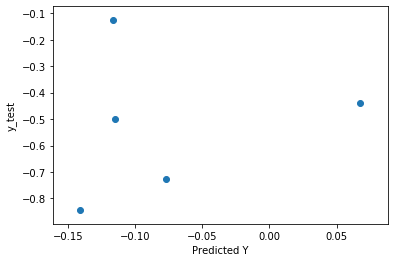

In [ ]:
plt.scatter(predictions,y_test)
plt.xlabel('Predicted Y')
plt.ylabel('y_test')

# Evaluating The Model

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:' ,metrics.mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.45067106423219017
MSE: 0.26445994998561556
RMSE: 0.5142566965880129


# Residuals

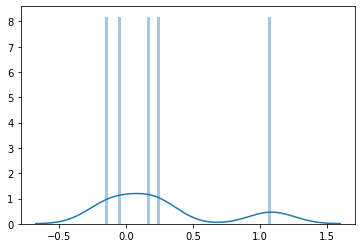

In [ ]:
sns.distplot((y_test-predictions),bins=51);

In [ ]:
coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coeffecients']
coeffecients

,Coeffecients
Asian_confirmed,0.634223


# Linear regression model for American indian and Alaska native race

In [ ]:
df=df.astype({'American indian and Alaska native_confirmed': 'int32', 'American indian and Alaska native_confirmed': 'int32'})

(array([17.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   0. ,  523.8, 1047.6, 1571.4, 2095.2, 2619. , 3142.8, 3666.6,
        4190.4, 4714.2, 5238. ]),
 <a list of 10 Patch objects>)

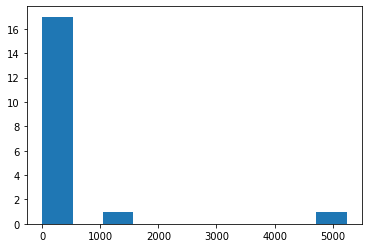

In [ ]:
plt.hist(x = df['American indian and Alaska native_confirmed'])

(array([9., 6., 1., 0., 1., 1., 0., 0., 0., 1.]),
 array([ 12438. ,  44110.4,  75782.8, 107455.2, 139127.6, 170800. ,
        202472.4, 234144.8, 265817.2, 297489.6, 329162. ]),
 <a list of 10 Patch objects>)

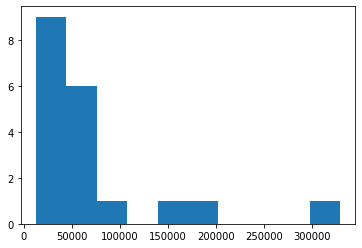

In [ ]:
 plt.hist(x = df["Total_confirmed"])

In [ ]:
x = df[['American indian and Alaska native_confirmed']]
y = df[['Total_confirmed']]

In [ ]:
x.columns

Index(['American indian and Alaska native_confirmed'], dtype='object')

In [ ]:
from sklearn import preprocessing
import numpy as np

x_arr = np.array(x).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
x_scaler = standardscaler.fit_transform(x_arr)
# print(x_scaler)

x_scaledback = standardscaler.inverse_transform(x_scaler)
print(x_scaledback)

[[ 458.]
 [ 183.]
 [  45.]
 [   0.]
 [   0.]
 [   0.]
 [   0.]
 [ 345.]
 [1105.]
 [ 243.]
 [  87.]
 [5238.]
 [  79.]
 [ 275.]
 [   0.]
 [   0.]
 [  83.]
 [ 457.]
 [ 342.]]


In [ ]:
y_arr = np.array(y).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
y_scaler = standardscaler.fit_transform(y_arr)
# print(y_scaler)

y_scaledback = standardscaler.inverse_transform(y_scaler)
print(y_scaledback)

[[329162.]
 [ 37686.]
 [ 47287.]
 [153916.]
 [ 74260.]
 [105629.]
 [ 69388.]
 [ 42281.]
 [ 35419.]
 [ 21172.]
 [ 27683.]
 [175298.]
 [ 66853.]
 [ 12438.]
 [ 17487.]
 [ 56648.]
 [ 65274.]
 [ 39218.]
 [ 36942.]]


# Train Test and Split the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x_scaler,y_scaler)

# Creating and Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[0.04334656]]


# Predicting Test Data

In [ ]:
predictions = lm.predict(x_test)

Text(0, 0.5, 'y_test')

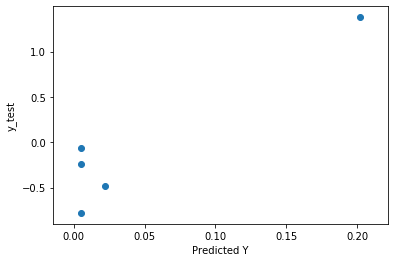

In [ ]:
plt.scatter(predictions,y_test)
plt.xlabel('Predicted Y')
plt.ylabel('y_test')

# Evaluating the Model

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:' ,metrics.mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5555418827973082
MSE: 0.4611832078605208
RMSE: 0.6791047105274125


# Residuals

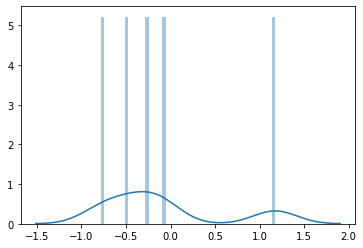

In [ ]:
sns.distplot((y_test-predictions),bins=51);

In [ ]:
coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coeffecients']
coeffecients

,Coeffecients
American indian and Alaska native_confirmed,0.043347
